### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

##### Limpieza y analisis

In [ ]:
#Comparando una misma columna en todas las tiendas

print(tienda['Categoría del Producto'].sort_values().unique())
print(tienda2['Categoría del Producto'].sort_values().unique())
print(tienda3['Categoría del Producto'].sort_values().unique())
print(tienda4['Categoría del Producto'].sort_values().unique())

#Conclusion: todas tienen la misma categoria

['Artículos para el hogar' 'Deportes y diversión' 'Electrodomésticos'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes' 'Libros' 'Muebles']
['Artículos para el hogar' 'Deportes y diversión' 'Electrodomésticos'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes' 'Libros' 'Muebles']
['Artículos para el hogar' 'Deportes y diversión' 'Electrodomésticos'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes' 'Libros' 'Muebles']
['Artículos para el hogar' 'Deportes y diversión' 'Electrodomésticos'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes' 'Libros' 'Muebles']


In [ ]:
#Analizando las tiendas
print(tienda.info())
print(tienda2.info())
print(tienda3.info())
print(tienda4.info())

#todos tiene el mismo tamanio y no tienen valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data col

In [ ]:
#Analizando los archivos
tienda4.isnull().sum()  # se comprueba que no tenemos valores nulos

Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64

## 1. Análisis de facturación



In [ ]:
#Total columna de precio
totalTienda1 = tienda['Precio'].sum()
totalTienda2 = tienda2['Precio'].sum()
totalTienda3 = tienda3['Precio'].sum()
totalTienda4 = tienda4['Precio'].sum()

print(f'Total de ventas tienda1 {totalTienda1:,.0f}')
print(f'Total de ventas tienda2 {totalTienda2:,.0f}')
print(f'Total de ventas tienda3 {totalTienda3:,.0f}')
print(f'Total de ventas tienda4 {totalTienda4:,.0f}')

#Conclusion
#la tienda que mas vende es la tienda 1 y la que menos la 4

Total de ventas tienda1 1,150,880,400
Total de ventas tienda2 1,116,343,500
Total de ventas tienda3 1,098,019,600
Total de ventas tienda4 1,038,375,700


In [72]:
#Comparativa en porcentajes de venta de las tiendas sobre tienda 1
print(f'Porcentaje de venta de tienda2 {round((totalTienda1/totalTienda2*100-100), 3)}% menos')
print(f'Porcentaje de venta de tienda3 {round((totalTienda1/totalTienda3*100-100), 3)}% menos')
print(f'Porcentaje de venta de tienda4 {round((totalTienda1/totalTienda4*100-100), 3)}% menos')
print(f'La diferencia en facturacion entre la tienda1 y la tienda4 es de {round((totalTienda1-totalTienda4)/1000000, 1)} millones')

Porcentaje de venta de tienda2 3.094% menos
Porcentaje de venta de tienda3 4.814% menos
Porcentaje de venta de tienda4 10.835% menos
La diferencia en facturacion entre la tienda1 y la tienda4 es de 112.5 millones


## 2. Ventas por categoría

##### los mas vendidos por categoria

In [102]:
#creamos una funcion para obtener los productos mas vendidos por categoria
def productosVendidosCategoria(tienda):
    categorias = ['Artículos para el hogar','Deportes y diversión','Electrodomésticos', 'Electrónicos','Instrumentos musicales','Juguetes','Libros','Muebles']
    resultado = {}
    for categoria in categorias:
        cantidad = len(tienda[tienda['Categoría del Producto'] == categoria])
        resultado[categoria] = cantidad
    resultado_ordenado = dict(sorted(resultado.items(), key=lambda x: x[1], reverse=True))
    top_3 = dict(list(resultado_ordenado.items())[:3])
    return top_3

In [117]:
print(f'productos mas vendidos tienda1 {productosVendidosCategoria(tienda)}')
print(f'productos mas vendidos tienda2 {productosVendidosCategoria(tienda2)}')
print(f'productos mas vendidos tienda3 {productosVendidosCategoria(tienda3)}')
print(f'productos mas vendidos tienda4 {productosVendidosCategoria(tienda4)}')
print('')
print('Los valores para las tiendas son similares y no hay datos que indique que tienda vende mas\nPor tanto se hace un analisis por las categorias que mas facturan')

productos mas vendidos tienda1 {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338}
productos mas vendidos tienda2 {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313}
productos mas vendidos tienda3 {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315}
productos mas vendidos tienda4 {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338}

Los valores para las tiendas son similares y no hay datos que indique que tienda vende mas
Por tanto se hace un analisis por las categorias que mas facturan


##### Analisis de prueba solo para tienda1

In [ ]:
#ventas de las tiendas por categorias para tienda1
print(tienda['Categoría del Producto'].sort_values().unique())

#cual categoria vende mas en tienda 1?
categorias = ['Artículos para el hogar', 'Deportes y diversión' ,'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros','Muebles']

for i in categorias:
    a=tienda[tienda['Categoría del Producto']==i]['Precio'].sum()
    print(f'precio {a:,.0f}   para {i}')

['Artículos para el hogar' 'Deportes y diversión' 'Electrodomésticos'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes' 'Libros' 'Muebles']
precio 15,074,500   para Artículos para el hogar
precio 33,350,100   para Deportes y diversión
precio 283,260,200   para Electrodomésticos
precio 409,476,100   para Electrónicos
precio 75,102,400   para Instrumentos musicales
precio 20,262,200   para Juguetes
precio 9,321,300   para Libros
precio 192,528,900   para Muebles


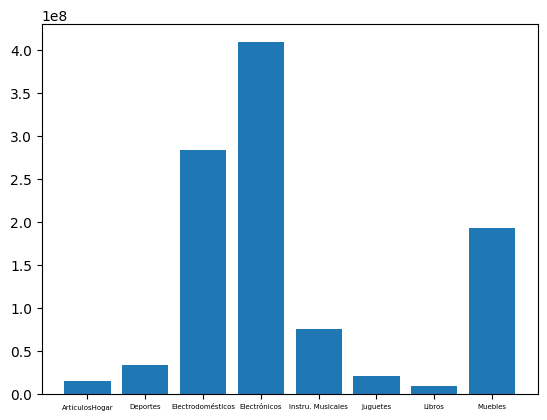

In [81]:
#Grafica de barras para tienda 1
#categorias
categorias = ['Artículos para el hogar', 'Deportes y diversión' ,'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros','Muebles']
x = ['ArtículosHogar', 'Deportes', 'Electrodomésticos', 'Electrónicos', 'Instru. Musicales' ,'Juguetes', 'Libros' ,'Muebles']
valores = [tienda[tienda['Categoría del Producto']==i]['Precio'].sum() for i in categorias]

plt.bar(x,valores)
plt.xticks(fontsize=5)
plt.show()

##### Analisis para el resto de tiendas

In [82]:
#Analisis grafico de ventas por categoria de todas las tiendas
categorias = ['Artículos para el hogar', 'Deportes y diversión' ,'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros','Muebles']
valores  = [tienda[tienda['Categoría del Producto']==i]['Precio'].sum() for i in categorias]
valores2 = [tienda2[tienda2['Categoría del Producto']==i]['Precio'].sum() for i in categorias]
valores3 = [tienda3[tienda3['Categoría del Producto']==i]['Precio'].sum() for i in categorias]
valores4 = [tienda4[tienda4['Categoría del Producto']==i]['Precio'].sum() for i in categorias]

A = Artículos para el hogar
D = Deportes y diversión
E = Electrodomésticos
El = Electrónicos
I = Instrumentos musicales
J = Juguetes
L = Libros
M = Muebles


<BarContainer object of 8 artists>

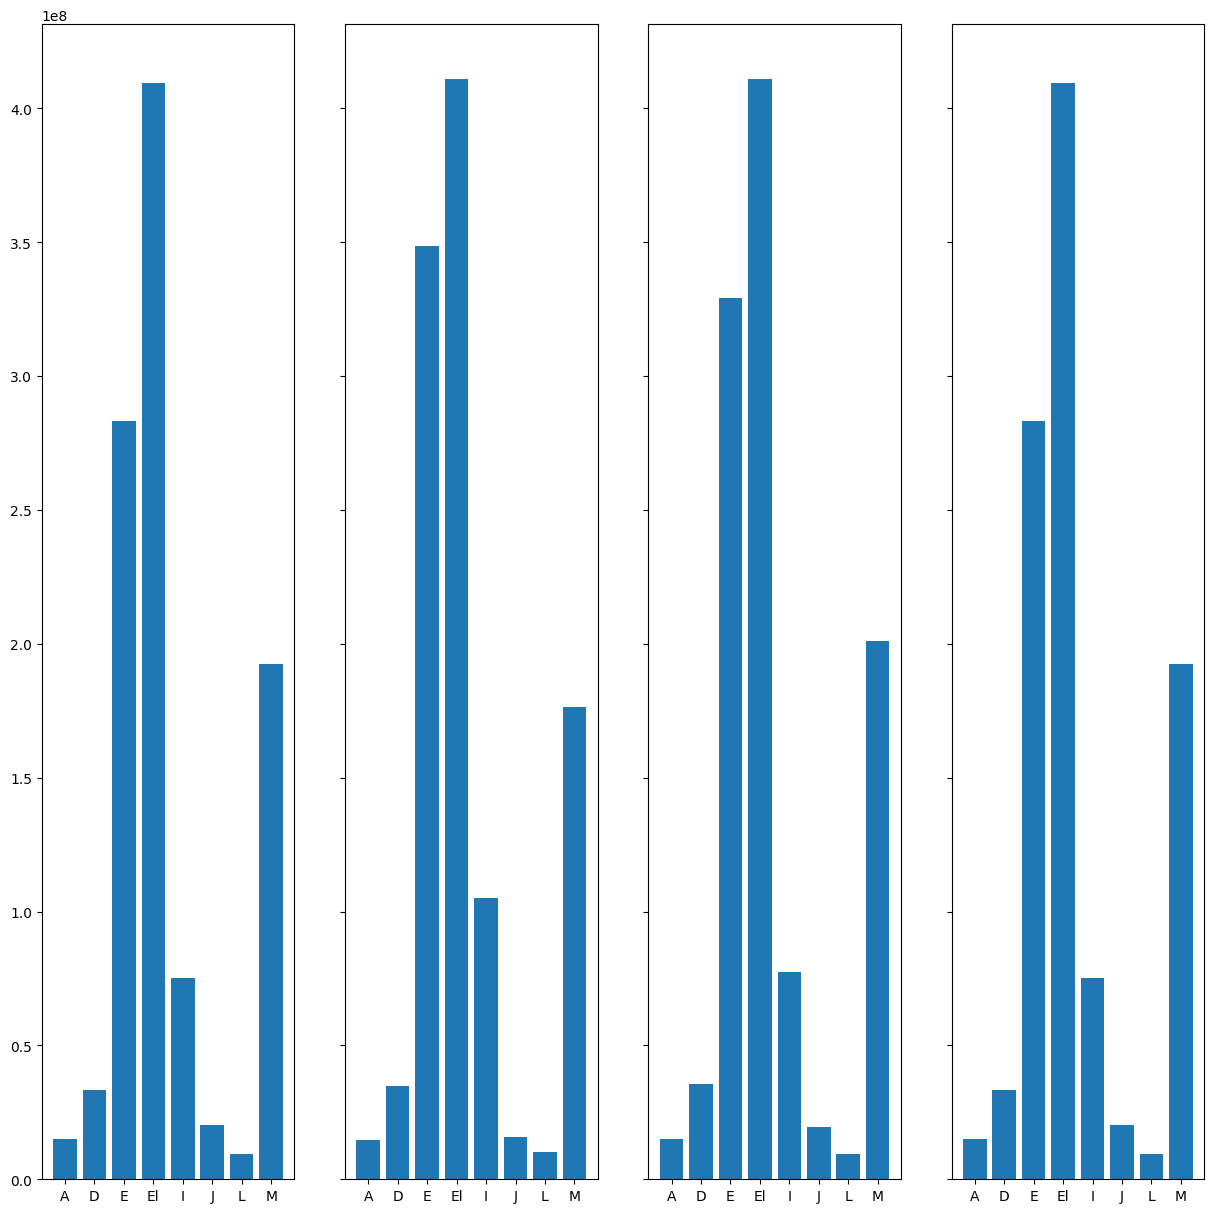

In [79]:
x= ['A','D','E','El','I','J','L','M']
for i in range(8):
    print(f'{x[i]} = {categorias[i]}')
    
fig, ax = plt.subplots(1,4, sharey=True, figsize=(15,15))
ax[0].bar(x,valores)
ax[1].bar(x,valores2)
ax[2].bar(x,valores3)
ax[3].bar(x,valores4)

In [126]:
#Conclusiones:
#las categorias que mas se venden en conjunto son 'electrodomesticos', 'electronicos' y muebles
#categorias = ['Artículos para el hogar', 'Deportes y diversión' ,'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros','Muebles']
#categorias que vamos a sumar  =[2,3,7] =>'electrodomesticos', 'electronicos' y muebles
categoriaSuma  = valores[2] +  valores[3] +  valores[7]
categoriaSuma2 = valores2[2] + valores2[3] + valores2[7]
categoriaSuma3 = valores3[2] + valores3[3] + valores3[7]
categoriaSuma4 = valores4[2] + valores4[3] + valores4[7]

print(f'Categorias electrodomesticos, electronicos y muebles tienda1 ${categoriaSuma:,.0f}')
print(f'Categorias electrodomesticos, electronicos y muebles tienda2 ${categoriaSuma2:,.0f}')
print(f'Categorias electrodomesticos, electronicos y muebles tienda3 ${categoriaSuma3:,.0f}')
print(f'Categorias electrodomesticos, electronicos y muebles tienda4 ${categoriaSuma4:,.0f}')
print('')
#Comparativa en porcentajes de venta de las tiendas sobre tienda 1
print(f'Porcentaje de venta de tienda1 {round((categoriaSuma3/categoriaSuma*100-100), 3)}% menos')
print(f'Porcentaje de venta de tienda2 {round((categoriaSuma3/categoriaSuma2*100-100), 3)}% menos')
print(f'Porcentaje de venta de tienda4 {round((categoriaSuma3/categoriaSuma4*100-100), 3)}% menos')
print(f'La diferencia en facturacion entre la tienda3 que mas vende y la menos vende es de {round((categoriaSuma3-categoriaSuma4)/1000000, 1)} millones') 
print('')
print('Conclusion: A pesar que las categorias mas vendidas son  muebles, electronicos\n            y juguetes la realidad es que los que generan mas recursos son\n            las categorias electrodomesticos, electronicos y muebles')  
print('Conclusion2: tanto la tienda 1 y 4 venden 6.3% menos eso es 55.8 millones menos')

Categorias electrodomesticos, electronicos y muebles tienda1 $885,265,200
Categorias electrodomesticos, electronicos y muebles tienda2 $935,825,200
Categorias electrodomesticos, electronicos y muebles tienda3 $941,085,800
Categorias electrodomesticos, electronicos y muebles tienda4 $885,265,200

Porcentaje de venta de tienda1 6.306% menos
Porcentaje de venta de tienda2 0.562% menos
Porcentaje de venta de tienda4 6.306% menos
La diferencia en facturacion entre la tienda3 que mas vende y la menos vende es de 55.8 millones

Conclusion: A pesar que las categorias mas vendidas son  muebles, electronicos
            y juguetes la realidad es que los que generan mas recursos son
            las categorias electrodomesticos, electronicos y muebles
Conclusion2: tanto la tienda 1 y 4 venden 6.3% menos eso es 55.8 millones menos


# 3. Calificación promedio de la tienda


In [130]:
#se puede hallar la calificacion por tienda, pero como se vio en el anterior ejercicio 
#los productos electrodomesticos, electronicos y muebles son en suma la mayor parte de ingreso
#nos vamos a enfocar en esos productos

totalTiendas = [tienda,tienda2,tienda3,tienda4]

for indice,tienda in enumerate(totalTiendas):
    print(f'calificacion total por tienda{indice+1}',tienda['Calificación'].sum())  

print('')
print(f'Las tiendas 2 y 4 superan a las tiendas 1 y 4 por {9550-9422} puntos mas, estos datos no son concluyentes')  

calificacion total por tienda1 9422
calificacion total por tienda2 9524
calificacion total por tienda3 9550
calificacion total por tienda4 9422

Las tiendas 2 y 4 superan a las tiendas 1 y 4 por 128 puntos mas, estos datos no son concluyentes


In [132]:
#estos datos no sirven para obtener un diferencial tanto tienda 1y 4 tienne el mismo valor
#y basicamente no hay diferencia entre 2y3

#tomamos la calificaion por las categoria prncipales que son las que tiene mas peso economicamente
categoriasPrincipal= ['Electrodomésticos','Electrónicos','Muebles']

for indice,tienda in enumerate(totalTiendas):
    suma=0
    for categoria in categoriasPrincipal:
        total =tienda[tienda['Categoría del Producto']==categoria]['Calificación'].sum()
        suma =suma+total
    print(f'tienda{indice+1} en categoria:Electrodomésticos,Electrónicos,Muebles  {suma}')

#por este metodo tienda3 tiene 233 votos mas que las otras tiendas
print(f'la tienda3 tiene {round((233*100/9500), 2)}% mas calificaciones que las otras')
print('')
print('Conclusion: tanto por el total como por las categorias mas vendidas las calificaciones para\n            todas las tiendas son muy similares  y por lo tanto no concluyentes')

tienda1 en categoria:Electrodomésticos,Electrónicos,Muebles  4724
tienda2 en categoria:Electrodomésticos,Electrónicos,Muebles  4727
tienda3 en categoria:Electrodomésticos,Electrónicos,Muebles  4958
tienda4 en categoria:Electrodomésticos,Electrónicos,Muebles  4724
la tienda3 tiene 2.45% mas calificaciones que las otras

Conclusion: tanto por el total como por las categorias mas vendidas las calificaciones para
            todas las tiendas son muy similares  y por lo tanto no concluyentes


# 4. Productos más y menos vendidos

In [ ]:
# buscamos el top de productos mas vendidos por tienda
max1 = pd.Series( tienda['Producto'].value_counts().head(3))
max2 = pd.Series(tienda2['Producto'].value_counts().head(3))
max3 = pd.Series(tienda3['Producto'].value_counts().head(3))
max4 = pd.Series(tienda4['Producto'].value_counts().head(3))

#visualizamos los datos
produtosMaxVendidosDicc = {'Tienda1':max1,'Tienda2':max2,'Tienda3':max3,'Tienda4':max4}
produtosMaxVendidos = pd.DataFrame(produtosMaxVendidosDicc)
produtosMaxVendidos.fillna('')


,Tienda1,Tienda2,Tienda3,Tienda4
Producto,,,,
Armario,60.0,,,
Batería,,61.0,,
Cama box,,,,62.0
Cama king,,,56.0,
Cubertería,,,,59.0
Dashboards con Power BI,,,,56.0
Iniciando en programación,,65.0,,
Kit de bancas,,,57.0,
Mesa de comedor,,,56.0,


In [78]:
# buscamos el top de productos menos vendidos por tienda
min1 = pd.Series( tienda['Producto'].value_counts().tail(3))
min2 = pd.Series(tienda2['Producto'].value_counts().tail(3))
min3 = pd.Series(tienda3['Producto'].value_counts().tail(3))
min4 = pd.Series(tienda4['Producto'].value_counts().tail(3))

#visualizamos los datos
produtosMinVendidosDicc = {'Tienda1':min1,'Tienda2':min2,'Tienda3':min3,'Tienda4':min4}
produtosMinVendidos = pd.DataFrame(produtosMinVendidosDicc)
produtosMinVendidos.fillna('')

,Tienda1,Tienda2,Tienda3,Tienda4
Producto,,,,
Armario,,,,34.0
Auriculares con micrófono,33.0,,,
Bloques de construcción,,,35.0,
Celular ABXY,33.0,,,
Guitarra acústica,,,,37.0
Guitarra eléctrica,,,,33.0
Impresora,,34.0,,
Juego de mesa,,32.0,,
Mesa de comedor,,34.0,,


In [87]:
#conclusion
num = tienda['Producto'].count()
print(f'Conclusion: Tanto los productos de maxima y minima venta no resaltan\n            y como maximo representan el {round(65*100/num, 1)}% del total')


Conclusion: Tanto los productos de maxima y minima venta no resaltan
            y como maximo representan el 2.8% del total


# 5. Envío promedio por tienda